# **Crop Irrigation Scheduling Prediction**
*This study was prepared as a homework assignment for the Internet of Things lesson.*

Crop irrigation scheduling is the process of determining the **when** and **how much** water to apply to cropsto optimize growth and yield while minimizing water waste. It's essentially creating a watering plan for crops based on their specific needs and environmental conditions.

In [1]:
# Import the libraries we will analyze the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset

dataset = pd.read_csv('/content/drive/MyDrive/DATASETS/MSc IoT HW/dataset.csv')


## **Data Analysis**

In [ ]:
dataset.head()

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
0,Wheat,10,400,30,15,0
1,Wheat,7,200,30,32,0
2,Wheat,9,300,21,28,0
3,Wheat,3,500,40,22,0
4,Wheat,2,700,23,34,0


In [ ]:
dataset.shape

(501, 6)

In [ ]:
dataset.describe()

,CropDays,SoilMoisture,temperature,Humidity,Irrigation
count,501.000000,501.000000,501.000000,501.000000,501.000000
mean,64.053892,411.391218,24.682635,39.381238,0.393214
std,45.935554,199.099590,12.111527,22.618231,0.488952
min,1.000000,120.000000,14.000000,11.000000,0.000000
25%,27.000000,230.000000,20.000000,19.000000,0.000000
50%,57.000000,369.000000,24.000000,32.000000,0.000000
75%,90.000000,554.000000,28.000000,65.000000,1.000000
max,210.000000,990.000000,263.000000,85.000000,1.000000


In [ ]:
dataset['CropDays'].describe()

count    501.000000
mean      64.053892
std       45.935554
min        1.000000
25%       27.000000
50%       57.000000
75%       90.000000
max      210.000000
Name: CropDays, dtype: float64

In [ ]:
dataset['SoilMoisture'].describe()

count    501.000000
mean     411.391218
std      199.099590
min      120.000000
25%      230.000000
50%      369.000000
75%      554.000000
max      990.000000
Name: SoilMoisture, dtype: float64

In [ ]:
dataset['temperature'].describe()

count    501.000000
mean      24.682635
std       12.111527
min       14.000000
25%       20.000000
50%       24.000000
75%       28.000000
max      263.000000
Name: temperature, dtype: float64

In [ ]:
dataset['Humidity'].describe()

count    501.000000
mean      39.381238
std       22.618231
min       11.000000
25%       19.000000
50%       32.000000
75%       65.000000
max       85.000000
Name: Humidity, dtype: float64

In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CropType      501 non-null    object
 1   CropDays      501 non-null    int64 
 2   SoilMoisture  501 non-null    int64 
 3   temperature   501 non-null    int64 
 4   Humidity      501 non-null    int64 
 5   Irrigation    501 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ KB


Column Details:

CropType:
Data type: object (usually contains string values)
Number of non-missing values: 501 (i.e. no missing data)

CropDays
Data type: int64 (integer)
Number of values that are not missing: 501 (no missing data)

SoilMoisture
Data type: int64 (integer)
Number of values that are not missing: 501 (no missing data)

temperature:
Data type: int64 (integer)
Number of values that are not missing: 501 (no missing data)

Humidity
Data type: int64 (integer)
Number of values that are not missing: 501 (no missing data)

Irrigation
Data type: int64 (integer)
Number of values that are not missing: 501 (no missing data)

Missing value analysis:

In [ ]:
dataset.isnull().sum()

CropType        0
CropDays        0
SoilMoisture    0
temperature     0
Humidity        0
Irrigation      0
dtype: int64

Analyzing Data Distributions:

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

  Continuos variable

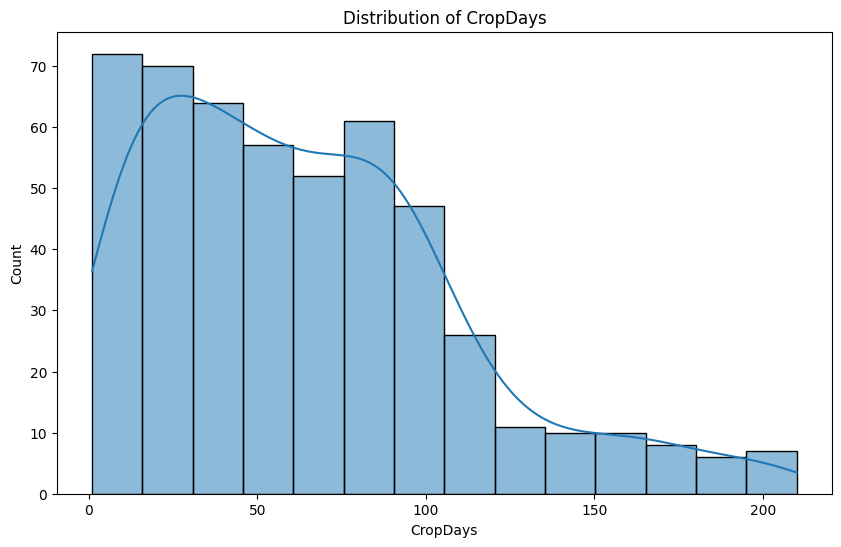

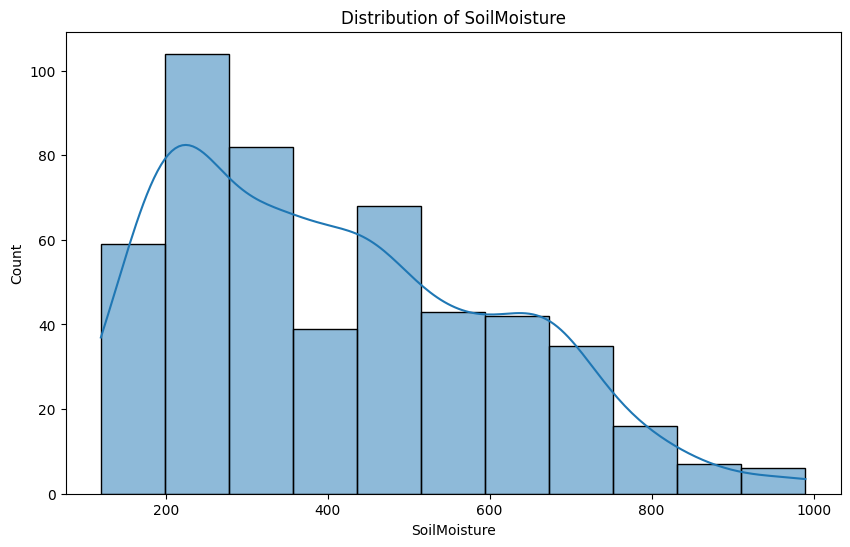

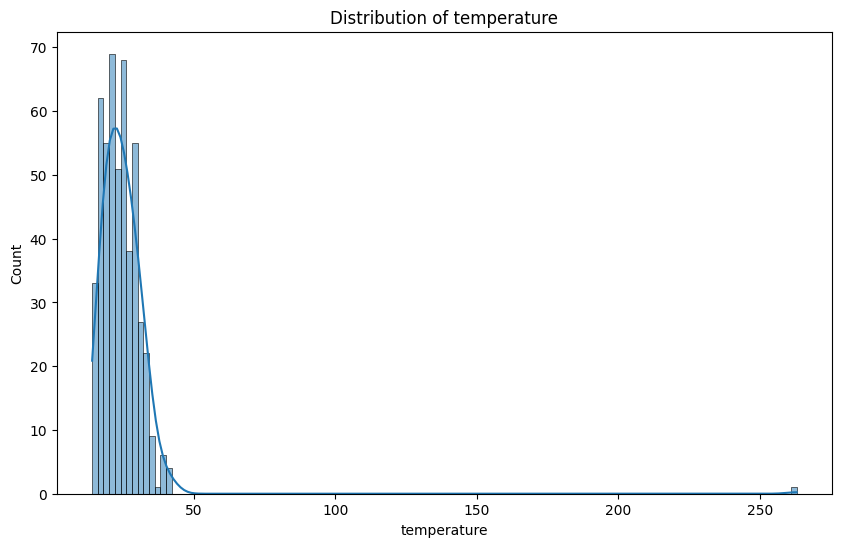

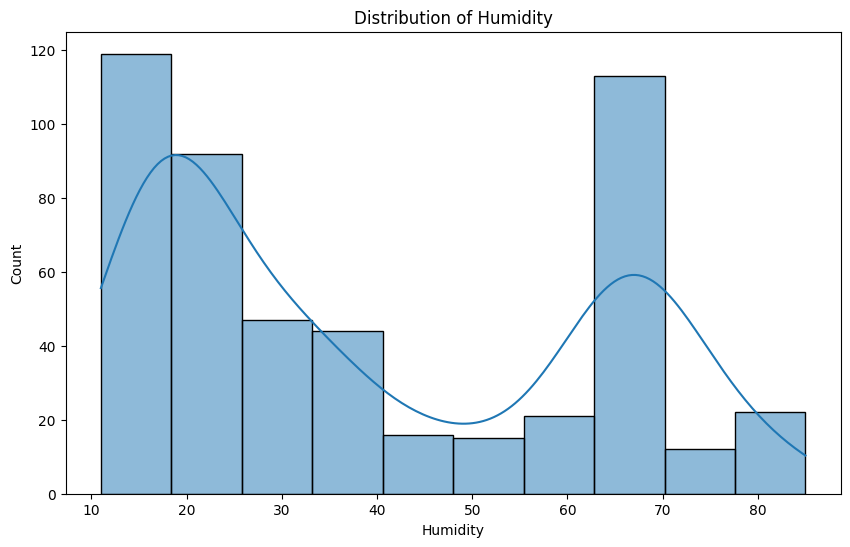

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_features = ['CropDays', 'SoilMoisture', 'temperature', 'Humidity']

for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=dataset, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
    """

Categorical Variable

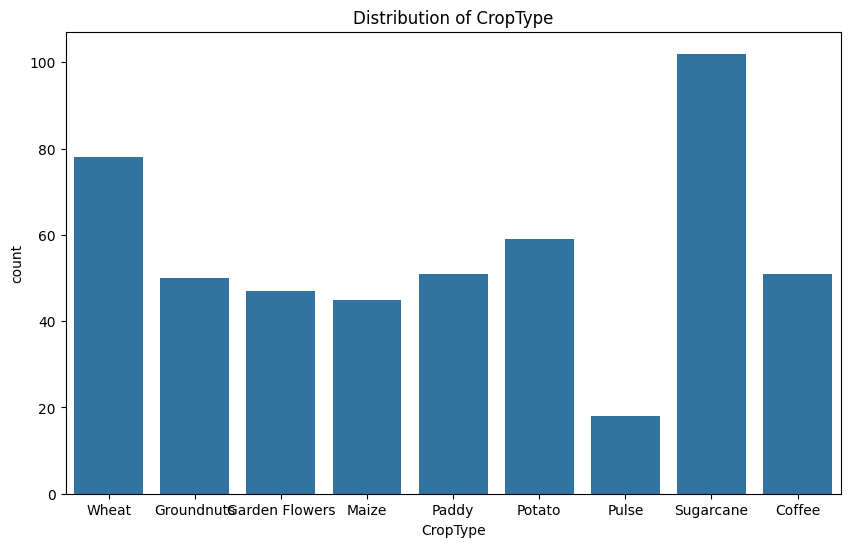

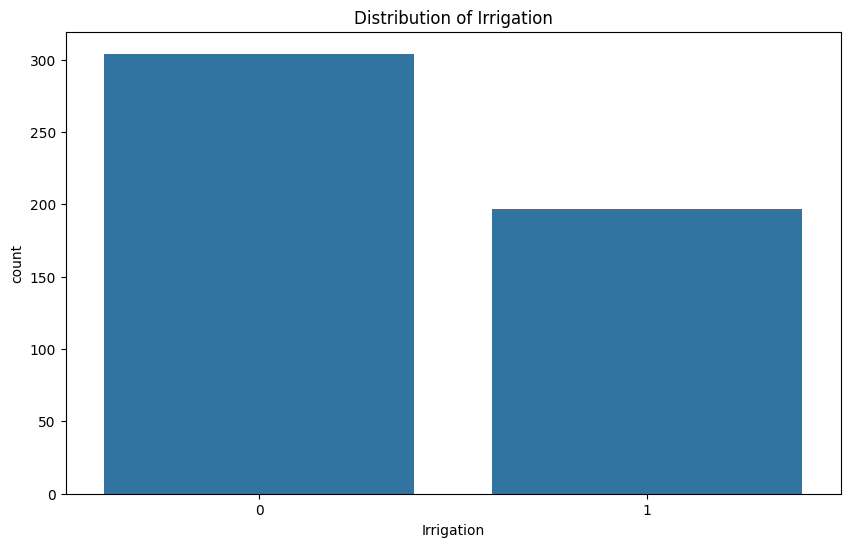

In [ ]:
categorical_features = ['CropType', 'Irrigation']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dataset, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.show()

Correlation Analysis

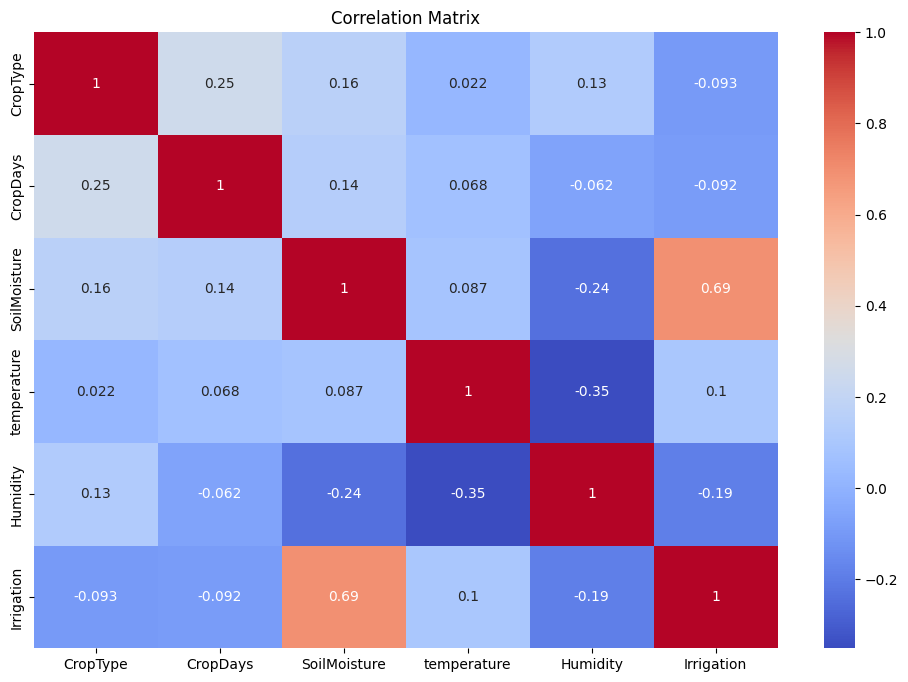

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['CropType'] = le.fit_transform(dataset['CropType'])

numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = dataset.corr()

plt.figure(figsize=(12 , 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The error message ValueError: could not convert string to float: 'Wheat' indicates that the dataset DataFrame contains non-numeric values in the columns used for calculating the correlation matrix. The corr() method expects all values in these columns to be numeric, but it encountered a string value ('Wheat') in the CropType column.
Filter non-numeric columns:

numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = dataset[numeric_cols].corr()
Use code with caution
This code snippet selects only the columns with numeric data types from the dataset and then calculates the correlation matrix using only those columns.

Convert non-numeric values:
Alternatively, you can convert the non-numeric values to numeric values before calculating the correlation matrix. For example, you can convert the CropType column to numeric values using the LabelEncoder class from the sklearn.preprocessing module:


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['CropType'] = le.fit_transform(dataset['CropType'])

numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = dataset[numeric_cols].corr()
Use code with caution
This code snippet first imports the LabelEncoder class, then creates an instance of it and uses the fit_transform() method to convert the string values in the CropType column to numeric values. Finally, it selects the numeric columns and calculates the correlation matrix.

Note:

The choice of which approach to use depends on the specific data and the desired outcome. If the non-numeric values represent categorical variables, converting them to numeric values may not be appropriate. In such cases, it is better to filter out the non-numeric columns before calculating the correlation matrix.



---



## Train Algorithms Without Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

**Quantifying a categorical variable:**
In machine learning, since the data is analyzed numerically, we convert object-valued data into numeric form.

In [ ]:
le = LabelEncoder()
dataset['CropType'] = le.fit_transform(dataset['CropType'])

Splittin feature and target data:

In [ ]:
X = dataset.drop('Irrigation', axis=1)
y = dataset['Irrigation']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
print('Random Forest Classifier')
print(classification_report(y_test, y_pred_rf))
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}\n')

Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        65
           1       0.82      1.00      0.90        36

    accuracy                           0.92       101
   macro avg       0.91      0.94      0.92       101
weighted avg       0.94      0.92      0.92       101

Accuracy: 0.9207920792079208



In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf) #roc_curve(y, scores, pos_label=2)

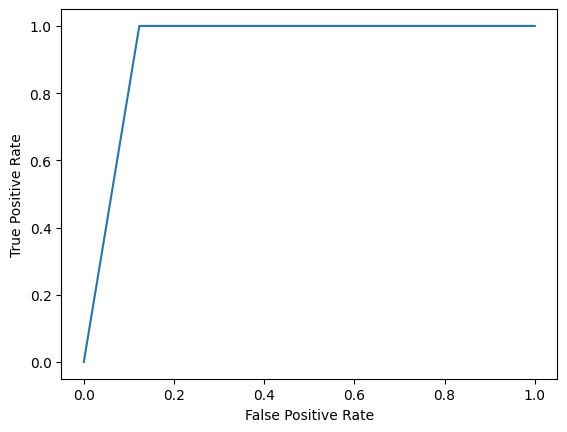

In [ ]:
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
#plt.show()
roc_display

In [ ]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
y_pred_svc = svc.predict(X_test)

In [ ]:
print('Support Vector Classifier')
print(classification_report(y_test, y_pred_svc))
print(f'Accuracy: {accuracy_score(y_test, y_pred_svc)}\n')

Support Vector Classifier
              precision    recall  f1-score   support

           0       0.96      0.80      0.87        65
           1       0.72      0.94      0.82        36

    accuracy                           0.85       101
   macro avg       0.84      0.87      0.85       101
weighted avg       0.88      0.85      0.85       101

Accuracy: 0.8514851485148515



In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

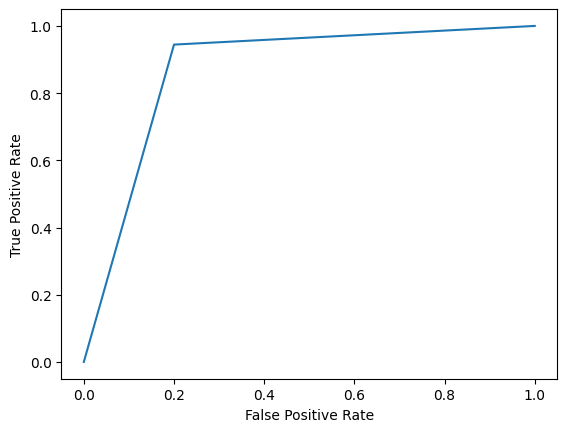

In [ ]:
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
#plt.show()
roc_display

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
print('K-Nearest Neighbor')
print(classification_report(y_test, y_pred_knn))
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}\n')

K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.98      0.77      0.86        65
           1       0.70      0.97      0.81        36

    accuracy                           0.84       101
   macro avg       0.84      0.87      0.84       101
weighted avg       0.88      0.84      0.84       101

Accuracy: 0.8415841584158416



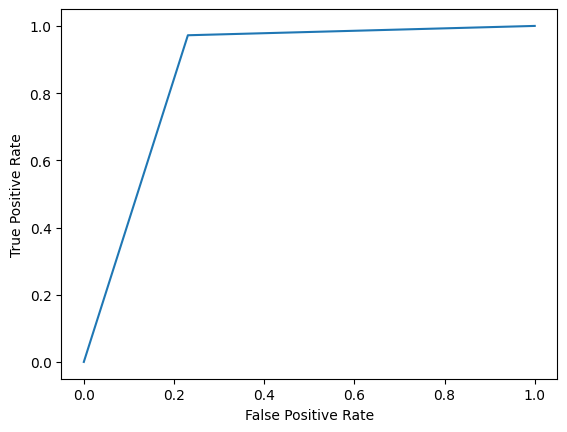

In [ ]:
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
#plt.show()
roc_display

Comparing the Models:

Accuracy: Random Forest achieved the highest accuracy (92.08%) followed by SVC (85.15%) and KNN (84.16%). This indicates that Random Forest was generally better at classifying data points correctly.

Precision vs Recall Trade-off: There's a trade-off between precision and recall. A model with high precision might miss some true positive cases (low recall), while a model with high recall might classify some negative cases as positive (low precision).
Random Forest has a good balance between precision and recall for both classes (0 and 1).
SVC has high precision for class 0 (0.96) but lower recall (0.80), meaning it might miss some actual class 0 instances.
KNN has very high precision for class 0 (0.98) but lower recall (0.77), similar to SVC. Both models might struggle to identify some actual class 0 instances.
On the other hand, SVC and KNN have higher recall for class 1 (0.94 and 0.97 respectively) compared to Random Forest (0.88). This means they are better at identifying actual class 1 instances.

## Train Algorithms with Cross Validation


In [5]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [6]:
dataset_with_cv = pd.read_csv('/content/drive/MyDrive/DATASETS/MSc IoT HW/dataset.csv')

In [7]:
le2 = LabelEncoder()
dataset_with_cv['CropType'] = le2.fit_transform(dataset_with_cv['CropType'])

In [8]:
X2 = dataset_with_cv.drop('Irrigation', axis=1)
y2 = dataset_with_cv['Irrigation']

In [17]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [18]:
rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X2, y2)

RandomForestClassifier(random_state=42)

In [19]:
cv_scores = cross_val_score(rf2, X2, y2, cv=skf, scoring='accuracy')
print(f" Cross-Validation Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

 Cross-Validation Accuracy: 0.94 (+/- 0.07)


In [22]:
svc2 = SVC(random_state=42)
svc2.fit(X2, y2)

SVC(random_state=42)

In [24]:
cv_scores_svc = cross_val_score(svc2, X2, y2, cv=skf, scoring='accuracy')
print(f" Cross-Validation Accuracy: {cv_scores_svc.mean():.2f} (+/- {cv_scores_svc.std() * 2:.2f})")

 Cross-Validation Accuracy: 0.87 (+/- 0.03)


In [26]:
knn2 = KNeighborsClassifier()
knn2.fit(X2, y2)

KNeighborsClassifier()

In [27]:
cv_scores_knn = cross_val_score(knn2, X2, y2, cv=skf, scoring='accuracy')
print(f" Cross-Validation Accuracy: {cv_scores_svc.mean():.2f} (+/- {cv_scores_svc.std() * 2:.2f})")

 Cross-Validation Accuracy: 0.87 (+/- 0.03)
